# Block Cipher, Two PlainTexts with equal CTR Nonce - Exercises



- Suppose you, as an attacker, observe the following 32 byte ciphertext C:
  
    - C1 = 0x4664DC0697BBFE69330715079BA6C23D 

- Suppose you also observe the following 32 byte ciphertext D :
  
    - D1 = 0x517ECC05C3BDEA3B33570E1BD897D530 

- Suppose you know both ciphertexts were generated using AES and CTR mode with the same nonce. The
nonce is implicit, so it is not part of he ciphertext.  

- You also know the plaintext P corresponding to C:
  
  - P1 = 0x43727970746F67726170687920437279 

- What information, if any, can you infer about plaintext Q corresponding to D?  


  ---

- AES => block length = 128 = 16 bytes
- 32 bytes => 2 blocks of 16 bytes
- C1 = E(ctr) ⊕ P1 => E(ctr) = C1 ⊕ P1
- C2 = E(ctr+1) ⊕ P2 => E(ctr+1) = C2 ⊕ P2
- D1 = E(ctr) ⊕ Q1 => Q1 = D1 ⊕ E(ctr) => Q1 = D1 ⊕ C1 ⊕ P1
- D2 = E(ctr+1) ⊕ Q2 => Q2 = D2 ⊕ E(ctr+1) => Q2 = D2 ⊕ C2 ⊕ P2

In [6]:
from operator import xor

C1 = 0x4664DC0697BBFE69330715079BA6C23D
C2 = 0x2B84DE4F908D7D34AACE968B64F3DF75

D1 = 0x517ECC05C3BDEA3B33570E1BD897D530
D2 = 0x7BD0916B8D826B35B78BBB8D74E2C73B

P1 = 0x43727970746F67726170687920437279
P2 = 0x70746F6772617068792043727970746F

Q1 = xor(C1, xor(D1, P1))
Q2 = xor(C2, xor(D2, P2))

print(hex(Q1))
print(hex(Q2))


0x54686973206973206120736563726574
0x202020436f6e666964656e7469616c21


# Block Cipher Calculation - Exercise!

  

- A simple AES-like algorithm with block size 128 bits.
- It consists of 1 round only.
- The sequence of operations is an S-box substitution, a permutation, and an XOR with the key
- The S-box: see slide
- The permutation permutes bytes
  - say we have b = 0x1234567890, and s = [3,2,4,1,0], then permute (b,s) = 0x5612347890
  - We need to permute the 128 bits sequence according to this sequence: [15, 0, 14, 1, 13, 2, 12, 3, 11, 4, 10, 5, 9, 6, 8, 7]
- The key is 0x1032547698BADCFE1032547698BADCFE
- The input is 0x01002300450067008900AB00CD00EF00
- Question: what is the cipher (in hex)?

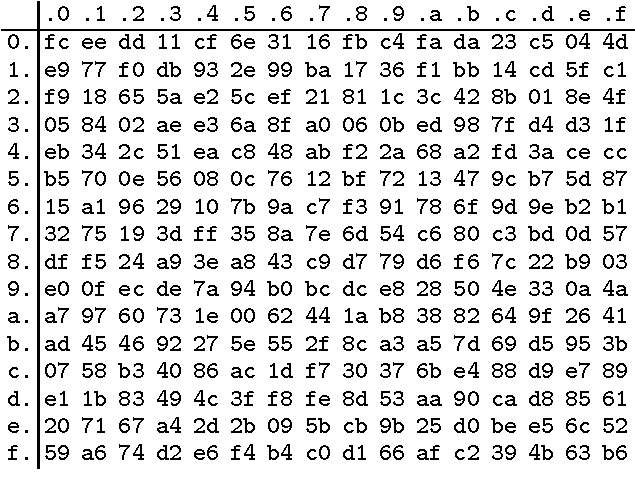

In [21]:
from cryptocourse import permute
from operator import xor



plain1 =         0x1122334455667788
plain2 =         0x1021324354657687
SboxSubsitute1 = 0x2d02bac141652027
SboxSubsitute2 = 0x7f4da0f293bf69e1

subkey1 = 0x1234567890ABCDEF
subkey2 = 0xFEDCBA0987654321

permuteSeq= [2,3,1,4,6,7,0,5]

print(plain1.bit_length())
print(plain2.bit_length())
print(SboxSubsitute1.bit_length())
print(SboxSubsitute2.bit_length())
print(subkey1.bit_length())

SboxSubsitutexor1 = xor(SboxSubsitute1, subkey1)

perm1 = permute.permute(SboxSubsitutexor1, permuteSeq)
cipher = xor(perm1, subkey2)

SboxSubsitutexor2 = xor(SboxSubsitute2, subkey1)

perm2 = permute.permute(SboxSubsitutexor2, permuteSeq)
cipher2 = xor(perm2, subkey2)

print("Cipher 1 :", hex(cipher))
print("Cipher 2 :", hex(cipher2))

61
61
62
63
61
Cipher 1 : 0x300d72b0b15aafcc
Cipher 2 : 0xeadfb483fe08b585


# Example with inverse S-box - block size 64

In [32]:
from cryptocourse import permute
from operator import xor


plain1 =         0x1122334455667788
plain2 =         0x8877665544332211
SboxSubsitute1 = 0x8293c31bfc33f5c4
SboxSubsitute2 = 0xC4F533FC1BC39382

plain1 =         0x1122334455667788
plain2 =         0x1021324354657687
SboxSubsitute1 = 0x2d02bac141652027
SboxSubsitute2 = 0x7f4da0f293bf69e1

subkey1 = 0x1234567890ABCDEF
subkey2 = 0xFEDCBA0987654321

permuteSeq= [2,3,1,4,6,7,0,5]

print("plain 1 bit length :" ,plain1.bit_length())
print("plain 2 bit length :" ,plain2.bit_length())
print("sbox1 bit length :", SboxSubsitute1.bit_length())
print("sbox2 bit length :",SboxSubsitute2.bit_length())
print("subkey1 bit length :", subkey1.bit_length())
print("subkey2 bit length :", subkey2.bit_length())

SboxSubsitutexor1 = xor(SboxSubsitute1, subkey1)

perm1 = permute.permute(SboxSubsitutexor1, permuteSeq)
cipher = xor(perm1, subkey2)

SboxSubsitutexor2 = xor(SboxSubsitute2, subkey1)

perm2 = permute.permute(SboxSubsitutexor2, permuteSeq)
cipher2 = xor(perm2, subkey2)

print("ECB Cipher 1 :", hex(cipher))
print("ECB Cipher 2 :", hex(cipher2))

#CBC => cipher block chaining
#initialisation vector
IV = 0x00000000000
#XOR before encryption with cipher from chain
cbc2 = xor(plain2, cipher)
print("CBC2 to sbox :", hex(cbc2)) 
#Sbox,perm, xor with key
cbc2toSbox= 0xeec7f73f64c6f408
sboxcbc2 =  0x28c6687543b4bf30
SboxcbcSubsitutexor2 = xor(sboxcbc2, subkey1)
permcbc2 = permute.permute(SboxcbcSubsitutexor2,permuteSeq)
ciphercbc2 = xor(permcbc2, subkey2) 

print(f'CBC : Cipher 1 = {hex(cipher)}, Cipher 2 = {hex(ciphercbc2)}')



plain 1 bit length : 61
plain 2 bit length : 61
sbox1 bit length : 62
sbox2 bit length : 63
subkey1 bit length : 61
subkey2 bit length : 64
ECB Cipher 1 : 0x300d72b0b15aafcc
ECB Cipher 2 : 0xeadfb483fe08b585
CBC2 to sbox : 0x202c40f3e53fd94b
CBC : Cipher 1 = 0x300d72b0b15aafcc, Cipher 2 = 0xe10f6504755f7d53


In [45]:
from cryptocourse import permute
from operator import xor

plain = 0x1000200030004000500060007000800010002000300040005000600070008001
print("Plain length:",plain.bit_length())

plain1 =         0x10002000300040005000600070008001
plain2 =         0x00002000300040005000600070008001
SboxSubsitute1 = 0x09526a52d55230523652a5523852bf7c
SboxSubsitute2 = 0x52526a52d55230523652a5523852bf7c


key = 0x88f38c0c8fd8712b8bc076f3787b9d17


permuteSeq= [1,0,3,2,5,4,7,6,9,8,11,10,13,12,15,14]

print("plain 1 bit length :" ,plain1.bit_length())
print("plain 2 bit length :" ,plain2.bit_length())
print("sbox1 bit length :", SboxSubsitute1.bit_length())
print("sbox2 bit length :",SboxSubsitute2.bit_length())
print("key bit length :", key.bit_length())


perm1 = permute.permute(SboxSubsitute1, permuteSeq)
cipher = xor(perm1, key)

perm2 = permute.permute(SboxSubsitute2, permuteSeq)
cipher2 = xor(perm2, key)

print("ECB Cipher 1 :", hex(cipher))
print("ECB Cipher 2 :", hex(cipher2))





Plain length: 253
plain 1 bit length : 125
plain 2 bit length : 110
sbox1 bit length : 124
sbox2 bit length : 127
key bit length : 128
ECB Cipher 1 : 0x378fb45e2a8a4779bb92a3a112299445
ECB Cipher 2 : 0x378fb45e2a8a4779bb92a3a11229cf45


# Variations of block cipher calculation - Exercise

- Suppose there are two blocks
  - 0x01002300450067008900AB00CD00EF00
  - 0x01002300450067008900AB00CD00EF01
- What if we use ECB?
- What if we use CBC? (take IV = 0)
- What if we use CTR with counter values:
  - CTR1 = 0x00000000000000000000000000000001 and
  - CTR2 = 0x00000000000000000000000000000002
- If I would ask to decrypt, you should use the inverse S-box (should be given)
  - omgekeerd algortime, elke stap omdraaien. Sbox met inverse sbox, inverse permutatie, xor blijft xor.
- I may provide S-box and inverse S-box, but you may only need one
  - 
- I may not say there are two blocks, but you can count yourself if you know the block size

In [15]:
block1 = 0x01002300450067008900AB00CD00EF00
block2 = 0x01002300450067008900AB00CD00EF01


SboxBlock1 = 0xeefc5afcc8fcc7fc79fc82fcd9fc52fc
SboxBlock2 = 0xeefc5afcc8fcc7fc79fc82fcd9fc52ee

key= 0x1032547698BADCFE1032547698BADCFE
permSeq = [15, 0, 14, 1, 13, 2, 12, 3, 11, 4, 10, 5, 9, 6, 8, 7]

#ECB - Electronic Code Book

#Sbox
#Permutation
#XOR with key
perm1 = permute.permute(SboxBlock1,permSeq)
perm2 = permute.permute(SboxBlock2,permSeq)

cipher1 = xor(perm1, key)
cipher2 = xor(perm2, key)

print(f'ECB : Cipher 1 = {hex(cipher1)}, Cipher 2 = {hex(cipher2)}')

#CBC => cipher block chaining
#initialisation vector
IV = 0x00000000000
#XOR before encryption with cipher from chain
cbc2 = xor(block2, cipher1)
#Sbox,perm, xor with key
sboxcbc2 = 0xb6f33b451e0696647be711d6b8488911
permcbc2 = permute.permute(sboxcbc2,permSeq)
ciphercbc2 = xor(permcbc2, key) 

print(f'CBC : Cipher 1 = {hex(cipher1)}, Cipher 2 = {hex(ciphercbc2)}')


#CTR => Counter  => decryption is same as encryption 
ctr1 = 0x00000000000000000000000000000001
ctr2 = 0x00000000000000000000000000000002

#counter encryption
sboxctr1 = 0xfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcee
sboxctr2 = 0xfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcdd

permctr1 = permute.permute(sboxctr1,permSeq)
permctr2 = permute.permute(sboxctr2,permSeq)

outputctr1 = xor(permctr1, key)
outputctr2 = xor(permctr2, key)

#xor with plain text

cipherctr1 = xor(outputctr1, block1)
cipherctr2 = xor(outputctr2, block2)

print(f'CTR : Cipher 1 = {hex(cipherctr1)}, Cipher 2 = {hex(cipherctr2)}')



ECB : Cipher 1 = 0xfe689cb1e13805aceccea88a64462002, Cipher 2 = 0xfe689cb1e13805acfecea88a64462002
CBC : Cipher 1 = 0xfe689cb1e13805aceccea88a64462002, Cipher 2 = 0xa6094ae0e3ab6477017a8291fcbc990d
CTR : Cipher 1 = 0xedce8b8a2146470277ce038aa946cf02, Cipher 2 = 0xedce8b8a2146470244ce038aa946cf03


In [ ]:
block1 = 0x01002300450067008900AB00CD00EF00
block2 = 0x01002300450067008900AB00CD00EF01


SboxBlock1 = 0xeefc5afcc8fcc7fc79fc82fcd9fc52fc
SboxBlock2 = 0xeefc5afcc8fcc7fc79fc82fcd9fc52ee

key= 0x1234567890ABCDEFFEDCBA0987654321FEDCBA09876543211234567890ABCDEF.
permSeq = [15, 0, 14, 1, 13, 2, 12, 3, 11, 4, 10, 5, 9, 6, 8, 7]

#ECB - Electronic Code Book

#Sbox
#Permutation
#XOR with key
perm1 = permute.permute(SboxBlock1,permSeq)
perm2 = permute.permute(SboxBlock2,permSeq)

cipher1 = xor(perm1, key)
cipher2 = xor(perm2, key)

print(f'ECB : Cipher 1 = {hex(cipher1)}, Cipher 2 = {hex(cipher2)}')

#CBC => cipher block chaining
#initialisation vector
IV = 0x00000000000
#XOR before encryption with cipher from chain
cbc2 = xor(block2, cipher1)
#Sbox,perm, xor with key
sboxcbc2 = 0xb6f33b451e0696647be711d6b8488911
permcbc2 = permute.permute(sboxcbc2,permSeq)
ciphercbc2 = xor(permcbc2, key) 

print(f'CBC : Cipher 1 = {hex(cipher1)}, Cipher 2 = {hex(ciphercbc2)}')


#CTR => Counter  => decryption is same as encryption 
ctr1 = 0x00000000000000000000000000000001
ctr2 = 0x00000000000000000000000000000002

#counter encryption
sboxctr1 = 0xfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcee
sboxctr2 = 0xfcfcfcfcfcfcfcfcfcfcfcfcfcfcfcdd

permctr1 = permute.permute(sboxctr1,permSeq)
permctr2 = permute.permute(sboxctr2,permSeq)

outputctr1 = xor(permctr1, key)
outputctr2 = xor(permctr2, key)

#xor with plain text

cipherctr1 = xor(outputctr1, block1)
cipherctr2 = xor(outputctr2, block2)

print(f'CTR : Cipher 1 = {hex(cipherctr1)}, Cipher 2 = {hex(cipherctr2)}')

